In [0]:
import pandas as pd
import tweepy

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#set up authentication 


consumer_key = "TwbRRubBVIP2cGTDYtu63cr0h"
consumer_secret = "QQoIE1GhGi21lJKXf9hohyeuEZ7EiKHJwTAv9JkoHARgOp0nes"

access_token = "956269904814116866-OVeK66V8P9nMSvN9gsWgxvc5si4hr0B"
access_token_secret = "vpREjagHxULRLq5FvUFD1OPFmRXsUEi7xGJ3nqd5PhFRL"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



#public_tweets = api.search("Trump")

#for tweet in public_tweets:
#  print(tweet.text)
#  analysis = TextBlob(tweet.text)
#  print(analysis.sentiment)

In [0]:
import re


def clean_tweet(tweet):
  """Utility function to clean the text in a tweet by removing links and special characters using regex"""
  
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())



In [0]:
# FIND RELATED TWEETS

tweets = api.search("Data Lit", count=200)


#CREATE A PANDAS DF TO STORE DATA IN

data  = pd.DataFrame(data = [clean_tweet(tweet.text) for tweet in tweets], columns = ["Tweets"])

display(data.head(10))
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

,Tweets
0,RT NO Gray lit is huge in conservation work Ev...
1,RT teaches Been thinking about how all my lite...
2,RT Emotion LIT scalable public private blockch...
3,LIT scalable public private blockchain with de...
4,It s annoying that our place is so long the Wi...
5,Hum pas sommeil Surtout que paquet DATA plein ...
6,RT teaches Been thinking about how all my lite...
7,SA Yes on Telkom platform as they can offer Fr...
8,Hi Sir I m here for the 300k yr Software Devel...
9,Empirical data is popular to the sheeple Would...


1129166718537019393
2019-05-16 23:28:19
Twitter for iPhone
0
1
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Mega_NO', 'name': "Megan N O'Donnell 📊👩\u200d🔬🐦🎨🎮", 'id': 2372315941, 'id_str': '2372315941', 'indices': [3, 11]}], 'urls': []}


In [0]:
import nltk
nltk.download('vader_lexicon')
#sid = SentimentIntensityanalyzer() 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
#Go through the tweets to analyze their sentiment
sid = SentimentIntensityAnalyzer()

list = []
for index, row in data.iterrows():
  ss= sid.polarity_scores(row["Tweets"])
  list.append(ss)
se = pd.Series(list)
data['polarity'] = se.values

display(data.head(100))

,Tweets,polarity
0,RT NO Gray lit is huge in conservation work Ev...,"{'neg': 0.104, 'neu': 0.815, 'pos': 0.081, 'co..."
1,RT teaches Been thinking about how all my lite...,"{'neg': 0.077, 'neu': 0.836, 'pos': 0.088, 'co..."
2,RT Emotion LIT scalable public private blockch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,LIT scalable public private blockchain with de...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,It s annoying that our place is so long the Wi...,"{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp..."
5,Hum pas sommeil Surtout que paquet DATA plein ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,RT teaches Been thinking about how all my lite...,"{'neg': 0.077, 'neu': 0.836, 'pos': 0.088, 'co..."
7,SA Yes on Telkom platform as they can offer Fr...,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound..."
8,Hi Sir I m here for the 300k yr Software Devel...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Empirical data is popular to the sheeple Would...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp..."


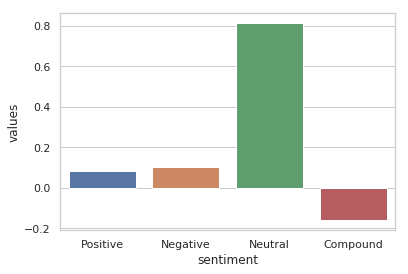

In [0]:
import numpy as np
import seaborn as sns

mean_pos = np.mean(data.iloc[0,1]['pos'])
mean_neg = np.mean(data.iloc[0,1]['neg'])
mean_neu = np.mean(data.iloc[0,1]['neu'])
mean_compound = np.mean(data.iloc[0,1]['compound'])

sns.set(style='whitegrid')

snt = {'sentiment': ['Positive', 'Negative', 'Neutral', 'Compound'], 'values':[mean_pos, mean_neg, mean_neu, mean_compound]}

df_mean = pd.DataFrame.from_dict(data=snt)
sns.barplot(x='sentiment', y ="values", data = df_mean)

